### Data Mining Spring 2024 Project:
#### Understanding and predicting Shark Presence in Near Shore Waters
#### Your Name: Jordan Dash<br><br>
<p> Due Dates:<br>
Deliverable 1:  Domain Understanding, Data Exploration and Preparation(due 4/17)<br>
Deliverable 2:  Decision Trees and Random Forests  (due 4/24)

#### Deliverable 1
<p>Follow the steps below which represent the Cross Industry Standard Process for Data Mining or CRISP-DM).  Each step will be represented in code (run the block of code) and there will be places for you to review a document (<font color=RED>REVIEW:</font>), watch a video (<font color=RED>VIDEO:</font>), answer questions (<font color=RED>QUESTION</font>:) and add code (<font color=RED>CODE:</font>). Deliverable 1 stops at the end of Step 3 (see below) with the Exporatory Data Analysis (after Visualizations).  For Deliverable 2, you will complete the steps and create a decision tree.</p>
<p>CRISP-DM Steps</p>
1. Problem Statement and Domain Understanding<br>
2. Input Libraries and Data<br>
3. Exploratory Data Analysis including Baseline for Evaluation<br>
4. Data Preprocessing for Modeling<br>
5. Modeling<br>
6. Evaluation<br>
7. Results and Future Work<br>
8. Citations<br>

### 1.  Problem Statement and Domain Understanding
<p>Problem Statement:  The purpose of this research is to improve the understanding of shark presence in near shore waters off of the coast of North and South Carolina,  Specifically, the research will investigate several years of summer time daily data including dates with documented shark attacks. Features involving weather, water, turtles, crabs and moon phases will be used in modeling to predict shark presence.</p>
<p>Domain Understanding:  Understanding the domain is an important first step of a data mining project.  We are exploring several years of data on shark attacks from the International Shark Attack File found at <a href="http://www.sharkattackfile.net/incidentlog.htm">Global Shark Attack File</a>.</p>
In order to understand the domain:<br><br>
<font color=RED>REVIEW:</font>  <a href="https://github.com/AKDDResearch/Shark-Attack/blob/master/SAS%20Shark%20Research%20Presentation%20Final.pdf">Developing a Recommender System for Shark Presence Along East Coast Beaches</a><br>

### 2. Input Libraries and Data

#### 2. A.  Import Libraries
<p>We are importing pandas and numpy for working with data, sklearn for scikit-learn to easily perform modeling, matplotlib for plotting and datetime to work with the date attribute.</p><p>You can simply run this code</p>


In [1]:
#some code so those pesky warnings from deprecated code won't appear
import warnings
def fxn():
    warnings.warn("deprecated", DeprecationWarning)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()
#the rest of the imports
#pandas for working with datasets
import pandas as pd
#numpy for working with arrays
import numpy as np
#seaborn for plotting and styling visualizations
import seaborn as sns
#matplotlib for additional customization
import matplotlib.pyplot as plt
#scikit-learn for preprocessing and modeling
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, r2_score, mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#datetime for working with dates
import datetime


<h4>2. B. Input Data, Review and Prepare Attributes</h4><br>
  <p>  NOTE:  This data has had transformations applied for the purpose of education and ease of understanding the process we use to apply data mining to predictive analysis.  Transformations include balancing the data set, discretization according to domain understanding and other methods, merging with other data sets according to date, and imputation or removal of null values by row or column. </p>
<p>Due to these changes, this particular data set should not be used for an actual production sytem for shark presence or attacks. For further studies, the data should be updated with additional years and rebuilt. It can be used, however, to gain an understanding of the problem in order to continue addressing the matter in a scientific manner.</p>
<p>We won't be using all of the attributes for our modeling, just a few of them. You can, however, use any of the attributes for your visualization.</p>

In [2]:
# encoding is a statement of the kinds of characters used
# this data set includes some special characters
# read the csv file sharkdata.csv into bdf
# you can examine the csv file on the github site for class
bdf = pd.read_csv('https://raw.githubusercontent.com/catawba-data-mining/CIS-3902-Data-Mining/main/sharkdata.csv', encoding="ISO-8859-1")
#let's take a look at the attributes and file size
bdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 38 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Date                             182 non-null    object 
 1   TurtleExactCountSC               147 non-null    float64
 2   turtleexactdiscretizeSC          147 non-null    object 
 3   TurtleExactCountNC               149 non-null    float64
 4   TurtleExactCombined              182 non-null    int64  
 5   TurtleexactdiscretizeNC          149 non-null    object 
 6   TurtleAttackActivity             68 non-null     float64
 7   TurtleAttackActivityDiscretized  31 non-null     object 
 8   Area                             68 non-null     object 
 9   Species                          48 non-null     object 
 10  Attack                           182 non-null    object 
 11  Timeofattack                     68 non-null     object 
 12  Beach                 

In [3]:
#let's take a look at the data
bdf.head()

,Date,TurtleExactCountSC,turtleexactdiscretizeSC,TurtleExactCountNC,TurtleExactCombined,TurtleexactdiscretizeNC,TurtleAttackActivity,TurtleAttackActivityDiscretized,Area,Species,...,windspeeddiscretize,prepmovingaverage,precipitationmvadiscretize,CrabLandings,CrabLandingsDisc,Direction,DirectionDisc,DirectionDiscInt,turbidity_kmeans_binning,turbidty_domain
0,5/4/2009,0.0,Low,0.0,0,Low,NaN,NaN,NaN,NaN,...,Medium,0.220,Low,1070,High,SW,SW,6,Low,Low
1,5/5/2009,0.0,Low,0.0,0,Low,NaN,NaN,NaN,NaN,...,Low,0.060,Low,133,Low,SSW,SW,6,Low,Medium
2,5/7/2009,1.0,Low,0.0,0,Low,NaN,NaN,NaN,NaN,...,Medium,0.062,Low,1061,High,SSW,SW,6,Low,Low
3,5/8/2009,0.0,Low,0.0,0,Low,NaN,NaN,NaN,NaN,...,Low,0.168,Low,341,Low,SW,SW,6,Low,Low
4,5/11/2009,2.0,Low,0.0,1,Low,NaN,NaN,NaN,NaN,...,Medium,0.000,Low,1140,High,NE,NE,1,Low,Medium


### 2. C. Transform certain variables to categories for better analysis <br>
<p>This is scary looking code but you can simply run it!</p>
<p>We are changing lots of attribures from type object (the way Python imports the non-numeric attribures) to type category.  We are keeping the full dataset in bdf at this point just in case you want to use some of these attribues in visualization!  They will work best as categories after this transformation.</p>

In [4]:
#change object type attributes - most of the discretized features - to categorical
#object type can be difficult to visualize and model
bdf["turtleexactdiscretizeSC"] = bdf["turtleexactdiscretizeSC"].astype('category')
bdf["TurtleexactdiscretizeNC"] = bdf["TurtleexactdiscretizeNC"].astype('category')
bdf["TurtleAttackActivityDiscretized"] = bdf["TurtleAttackActivityDiscretized"].astype('category')
bdf["Area"] = bdf["Area"].astype('category')
bdf["Attack"] = bdf["Attack"].astype('category')
bdf["Timeofattack"] = bdf["Timeofattack"].astype('category')
bdf["Beach"] = bdf["Beach"].astype('category')
bdf["DissolvedO2discretize"] = bdf["DissolvedO2discretize"].astype('category')
bdf["salinitydiscretize"] = bdf["salinitydiscretize"].astype('category')
bdf["turbiditydiscretize"] = bdf["turbiditydiscretize"].astype('category')
bdf["temperaturediscretize"] = bdf["temperaturediscretize"].astype('category')
bdf["precipitationdiscretize"] = bdf["precipitationdiscretize"].astype('category')
bdf["pressurediscretize"] = bdf["pressurediscretize"].astype('category')
bdf["windspeeddiscretize"] = bdf["windspeeddiscretize"].astype('category')
bdf["precipitationmvadiscretize"] = bdf["precipitationmvadiscretize"].astype('category')
bdf["CrabLandingsDisc"] = bdf["CrabLandingsDisc"].astype('category')
bdf["Direction"] = bdf["Direction"].astype('category')
bdf["DirectionDisc"] = bdf["DirectionDisc"].astype('category')
bdf["DirectionDiscInt"] = bdf["DirectionDiscInt"].astype('category')
bdf["MoonPhaseCat"] = bdf["MoonPhase"].astype('category')
bdf["MoonPhaseCatExtend"] = bdf["MoonPhaseIntExtend"].astype('category')
#change attack and moonphase cat to codes to help with scatter matrix visualization
#MoonPhaseCat is the actual MoonPhase as a string
#MoonPhaseCatExtended is the Extended MoonPhase
#0 is Quarter moons, 1 is wan gibb and wax cres, 2 is wax gibb and wan cres, 3 is Full and New
#DirectionDiscInt is the Wind Direction discretized
#NE = 1, E = 2, SE = 3, S = 4, W = 5, SW = 6
bdf["AttackCat"] = bdf["Attack"].cat.codes
bdf["MoonPhaseCatExtendCodes"] = bdf["MoonPhaseCatExtend"].cat.codes
bdf["DirectionDiscIntCodes"] = bdf["DirectionDiscInt"].cat.codes
#fix date time
bdf["Date"] = bdf["Date"].astype('category')
format_str = '%d/%m/%Y' # The format
bdf["Date"] = bdf["Date"].apply(pd.to_datetime)
#datetime.datetime.strptime(bdf["Date"], format_str)
#print info again on data frame and attributes
bdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 43 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   Date                             182 non-null    category
 1   TurtleExactCountSC               147 non-null    float64 
 2   turtleexactdiscretizeSC          147 non-null    category
 3   TurtleExactCountNC               149 non-null    float64 
 4   TurtleExactCombined              182 non-null    int64   
 5   TurtleexactdiscretizeNC          149 non-null    category
 6   TurtleAttackActivity             68 non-null     float64 
 7   TurtleAttackActivityDiscretized  31 non-null     category
 8   Area                             68 non-null     category
 9   Species                          48 non-null     object  
 10  Attack                           182 non-null    category
 11  Timeofattack                     68 non-null     category
 12  Beach   

In [5]:
#just run this code too
# are you curious about what we have now?
# let's take a look at the first few rows
bdf.head()

,Date,TurtleExactCountSC,turtleexactdiscretizeSC,TurtleExactCountNC,TurtleExactCombined,TurtleexactdiscretizeNC,TurtleAttackActivity,TurtleAttackActivityDiscretized,Area,Species,...,Direction,DirectionDisc,DirectionDiscInt,turbidity_kmeans_binning,turbidty_domain,MoonPhaseCat,MoonPhaseCatExtend,AttackCat,MoonPhaseCatExtendCodes,DirectionDiscIntCodes
0,2009-05-04,0.0,Low,0.0,0,Low,NaN,NaN,NaN,NaN,...,SW,SW,6,Low,Low,First quarter,0,0,0,5
1,2009-05-05,0.0,Low,0.0,0,Low,NaN,NaN,NaN,NaN,...,SSW,SW,6,Low,Medium,First quarter,0,0,0,5
2,2009-05-07,1.0,Low,0.0,0,Low,NaN,NaN,NaN,NaN,...,SSW,SW,6,Low,Low,Waxing gibbous,2,0,2,5
3,2009-05-08,0.0,Low,0.0,0,Low,NaN,NaN,NaN,NaN,...,SW,SW,6,Low,Low,Waxing gibbous,2,0,2,5
4,2009-05-11,2.0,Low,0.0,1,Low,NaN,NaN,NaN,NaN,...,NE,NE,1,Low,Medium,Full,3,0,3,0


<font color=RED>QUESTION:  </font>Notice that many attributes are represented by the raw value and a discretized value.  For example, turbidity is represented in "Turbidity" and "turbiditydiscretize".  What is the purpose of a discretized attribute like "turtleexactdiscretizeSC" which is built from "TurtleExactCountSC"? Place your answer in this markdown block.
 <br>

 The purpose of the discretized attirubtes is to allow for simplification. The exact number of turtles could be a range from 0 to the thousands so to keep things simple, the discretized value is just low, medium, or high. It also gives you a category should you want to compare categorical variables.

#### 2 C. Create "df" dataframe from "bdf" to only include the attributes needed for modeling.
<p>Use "bdf" for visualizations, etc. as it includes lots of data including discretized, categorical variables and date.  Use "df" for the attributes we are using for decision trees, random forest and Knn modeling.</p><p>Note:  This is a way to change the data for different types of analysis.  You can build df to include the features you want. Notice how we do not include two perfectly correlated variables in the same df dataset for modling such as  "Salinity" and "salinitydiscretize". We will use the numeric data in its origional form for modeling.</p>
<p>You can simply run this code but do pay attention to the attributes we will use for modeling.</p>

In [6]:
#df will include numeric attributes and attack as the target attribute
#for supervised learning
#we are leaving the turtles and crabs out for now, also temperature (it's always hot in summer) and more!
df = bdf[["AttackCat", "MoonPhaseCatExtendCodes", "StationPressure",
          "WindSpeed", "Salinity", "Turbidity",
          "DissolvedO2", "DirectionDiscIntCodes"]]
#take a look
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AttackCat                182 non-null    int8   
 1   MoonPhaseCatExtendCodes  182 non-null    int8   
 2   StationPressure          182 non-null    float64
 3   WindSpeed                182 non-null    float64
 4   Salinity                 182 non-null    float64
 5   Turbidity                182 non-null    float64
 6   DissolvedO2              182 non-null    float64
 7   DirectionDiscIntCodes    182 non-null    int8   
dtypes: float64(5), int8(3)
memory usage: 7.8 KB


In [7]:
# examine first 15 records
df.head(15)

,AttackCat,MoonPhaseCatExtendCodes,StationPressure,WindSpeed,Salinity,Turbidity,DissolvedO2,DirectionDiscIntCodes
0,0,0,29.96,6.4,24.215556,23.422222,82.555556,5
1,0,0,30.00,4.4,21.960000,26.844444,75.444444,5
2,0,2,29.92,7.5,20.451111,20.266667,78.511111,5
3,0,2,29.92,5.4,22.684444,15.488889,87.644444,5
4,0,3,29.98,7.2,23.186667,44.733333,91.244444,0
5,0,1,30.12,4.8,23.060000,9.533333,77.644444,2
6,0,1,30.07,4.3,23.135556,10.288889,86.444444,3
7,0,0,30.08,14.8,18.702222,34.777778,77.377778,0
8,0,3,29.85,2.8,24.248889,8.777778,57.644444,3
9,0,1,29.79,6.6,24.277778,15.775000,43.333333,5


### 3. Exploratory Data Analysis

#### 3. A. Establish a baseline measure for evaluation

Establish a baseline - we want to do better than the baseline otherwise why not just keep the baseline for your predictions?  A baseline is typically an easily calculated value that often represents a simple average or some measure that is currently in use to make predictions.  Our baseline is the overall percent of attacks for the data that is represented.  This shows if you always pick "No" for whether a shark will be in near shore waters with this data set, you will be accurate 62% of the time.

In [8]:
#we are going to calculate a simple percentage of attack = no or 0
#remember this data set has been balanced due to shark attack
#being a rare event
df["AttackCat"].value_counts()

AttackCat
0    114
1     68
Name: count, dtype: int64

In [9]:
randomAcc = df["AttackCat"].value_counts().max() / df["AttackCat"].value_counts().sum()
randomAcc = round(randomAcc * 100, 2)
print("Accuracy: {randomAcc}%".format(randomAcc = randomAcc))

Accuracy: 62.64%


Our predictions need to be better than the baseline measure of accuracy for predicting whether or not a shark will be in near shore water.

#### 3. B.  Exploratory Data Analysis

Describing a data frame with df.describe() shows statistics for numeric variables including quartiles.

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AttackCat,182.0,0.373626,0.485101,0.000000,0.000000,0.000000,1.000000,1.000000
MoonPhaseCatExtendCodes,182.0,1.445055,1.099851,0.000000,1.000000,1.000000,2.000000,3.000000
StationPressure,182.0,29.962308,0.111098,29.630000,29.900000,29.965000,30.040000,30.200000
WindSpeed,182.0,6.551648,3.169533,1.300000,4.300000,5.900000,7.875000,16.600000
Salinity,182.0,26.199711,4.462372,7.077778,23.229444,26.625556,29.510000,34.023077
Turbidity,182.0,38.295837,70.610488,2.666667,10.577778,15.865278,31.638889,640.000000
DissolvedO2,182.0,67.678997,16.786865,3.000000,62.642248,70.800000,76.633333,110.311111
DirectionDiscIntCodes,182.0,3.098901,1.898269,0.000000,2.000000,3.000000,5.000000,5.000000


#### 3. C. Scatter plot matrix:  This powerful visualization can answer the following questions:<br>
<p>Run the code and examine the results - they will appear after the long display of information on an array used in construction of the scatter matrix - you can disregard this.</p>


array([[<Axes: xlabel='MoonPhaseCatExtendCodes', ylabel='MoonPhaseCatExtendCodes'>,
        <Axes: xlabel='StationPressure', ylabel='MoonPhaseCatExtendCodes'>,
        <Axes: xlabel='WindSpeed', ylabel='MoonPhaseCatExtendCodes'>,
        <Axes: xlabel='Salinity', ylabel='MoonPhaseCatExtendCodes'>,
        <Axes: xlabel='Turbidity', ylabel='MoonPhaseCatExtendCodes'>,
        <Axes: xlabel='DissolvedO2', ylabel='MoonPhaseCatExtendCodes'>,
        <Axes: xlabel='DirectionDiscIntCodes', ylabel='MoonPhaseCatExtendCodes'>],
       [<Axes: xlabel='MoonPhaseCatExtendCodes', ylabel='StationPressure'>,
        <Axes: xlabel='StationPressure', ylabel='StationPressure'>,
        <Axes: xlabel='WindSpeed', ylabel='StationPressure'>,
        <Axes: xlabel='Salinity', ylabel='StationPressure'>,
        <Axes: xlabel='Turbidity', ylabel='StationPressure'>,
        <Axes: xlabel='DissolvedO2', ylabel='StationPressure'>,
        <Axes: xlabel='DirectionDiscIntCodes', ylabel='StationPressure'>],
       [

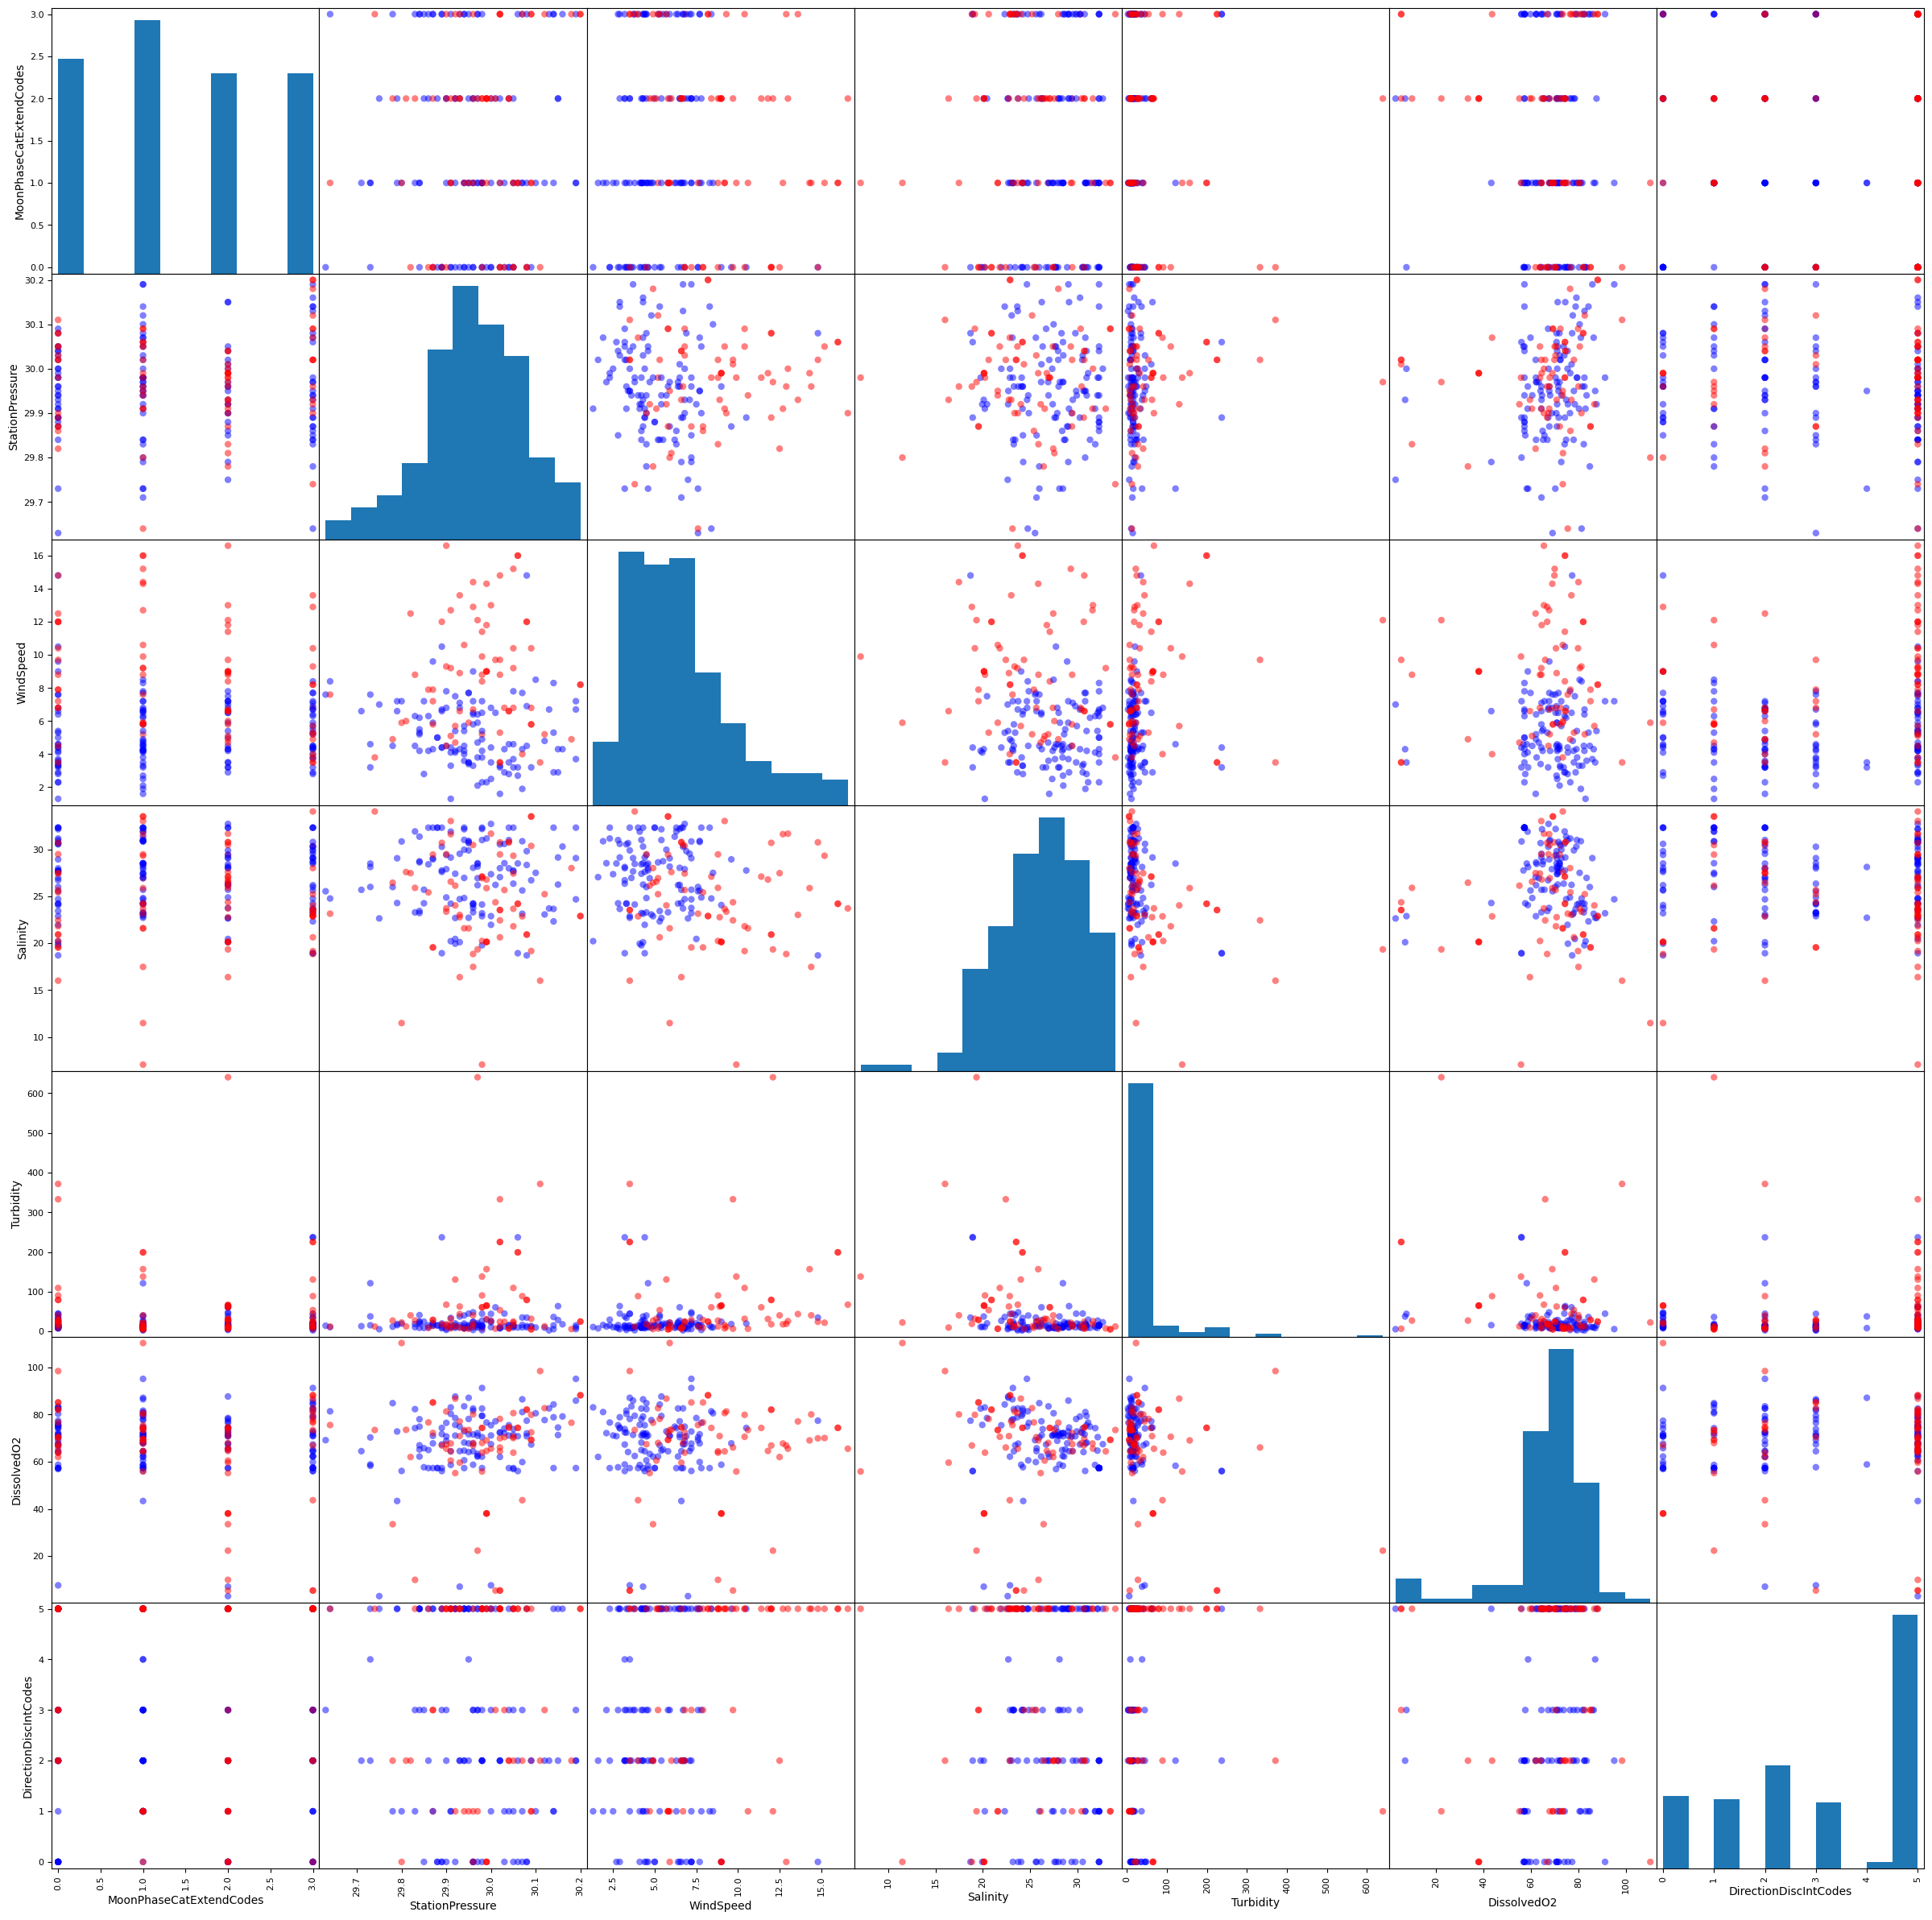

In [11]:
#we are going to set up some colors for attack = 0 (no attack) or 1 (attack)
attack_colors = {0:'blue', 1:'red'}
pd.plotting.scatter_matrix(df.loc[:,"MoonPhaseCatExtendCodes":"DirectionDiscIntCodes"],figsize=(30,30),grid=True,
                           marker='o', c= df['AttackCat'].map(attack_colors))


<font color=RED>QUESTION:  </font> <p>Are there any scatter plots that look interesting?  </p>
<p> Look for:
<p>
•Are there any pair-wise relationships between different variables? And if there are relationships, what is the nature of these relationships?<br>
Disolved O2 shows some weak but linear relationships with Station Pressure, Wind Speed, and Salinity. Also due to the size of the range of the data, Turbidity shows some stronger relationships with Dissolved O2, Salinity, Wind Speed, and Station Pressure, <br><br>

•Are there any outliers in the dataset?<br>
Turbidity shows some outlies in the data set with majority of the instances being roughly between 0 and 150. Salinity also shows some outliers with majority of the instances being between 20 and 35 but yet there is a few outliers around the 10 to 15 range.<br><br>

•Is there any evidence of clustering by groups present in the dataset on the basis of a particular variable? Wind Speed, Dissolved O2, and Salinity all show signs of clustering. When looking at the scatter plots that those variables are featured in, the data points seem to be within very close ranges. Turbidity shows clustering as well but it is only due to the size of the range and majority of the data points being within 0-150.</p>

<font color=RED>CODE:  </font>Add four interesting visualizations of your choice. Include markdown describing what you have learned about the data from your visualizations. You can use the df or bdf dataset at this point.<br><br>Here is a resource with examples that may give you some ideas for visualization:  <a href="https://elitedatascience.com/python-seaborn-tutorial#:~:text=The%20Ultimate%20Python%20Seaborn%20Tutorial%3A%20Gotta%20Catch%20%E2%80%98Em,it%20all%20together.%20...%2010%20Pok%C3%A9dex%20%28mini-gallery%29.%20">Using Seaborn for Visualization</a><br>

### Markdown for Visualization 1: (explain what you learn from the visualizaiton)
###From this visualization I was able to learn a little about how count of attacks is effected by Salinity. From the density curve and the shown histogram, it is shown that majority of the counts of attacks happened when salinity was extremely high (between 20 and 34 roughly).

<Axes: xlabel='Salinity', ylabel='Count'>

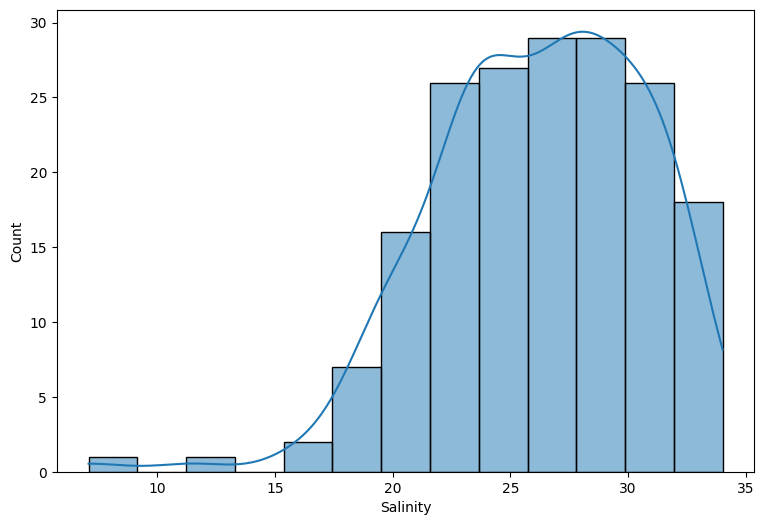

In [12]:
# Code for Visualization 1
# Distribution Plot (a.k.a. Histogram)
plt.figure(figsize=(9,6))
sns.histplot(df, x='Salinity',
             kde=True) # Plot the density curve too

### Markdown for Visualization 2: (explain what you learn from the visualizaiton)
###From this visualization I was able to learn a little about how count of attacks is effected by the Pressure that was recoreded at the station. From the density curve and the shown histogram, it is shown that majority of the counts of attacks happened when salinity was between 29.9 and 30.1 roughly which is on the higher end of the scale.

<Axes: xlabel='StationPressure', ylabel='Count'>

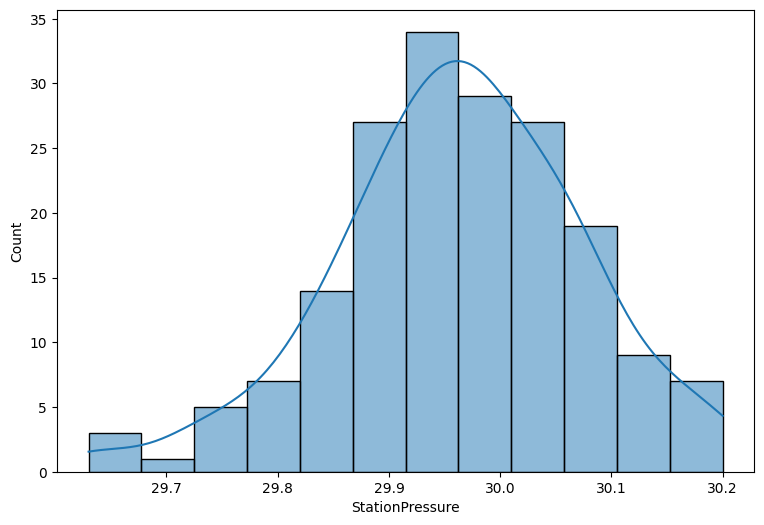

In [13]:
# Code for Visualization 2
# Distribution Plot (a.k.a. Histogram)
plt.figure(figsize=(9,6))
sns.histplot(df, x='StationPressure',
             kde=True) # Plot the density curve too

### Markdown for Visualization 3: (explain what you learn from the visualizaiton)
###From this visualization I was able to learn a little about how count of attacks is effected by the Wind Speed that was recorded at the station. From the density curve and the shown histogram, it is shown that majority of the counts of attacks happened when the recorded Wind Speed was extremely low (between 3 and 8 roughly).

<Axes: xlabel='WindSpeed', ylabel='Count'>

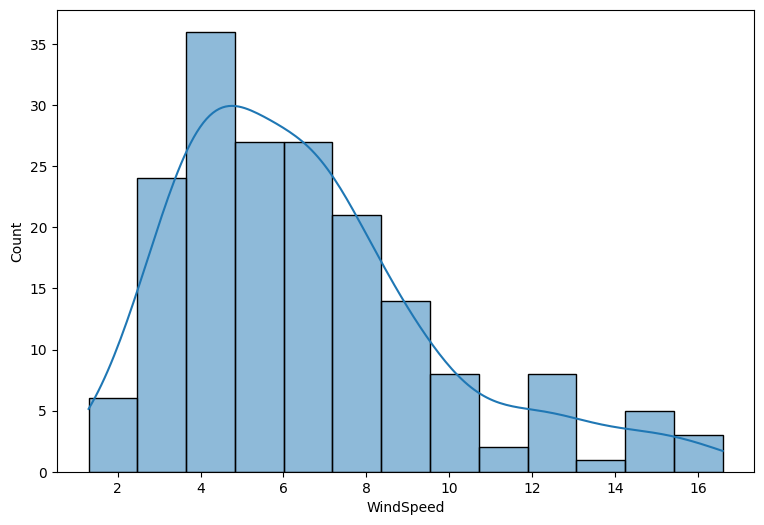

In [14]:
# Code for Visualization 3
# Distribution Plot (a.k.a. Histogram)
plt.figure(figsize=(9,6))
sns.histplot(df, x='WindSpeed',
             kde=True) # Plot the density curve too

### Markdown for Visualization 4: (explain what you learn from the visualizaiton) - END OF DELIVERABLE 1
###The below Scatter plot is a visual representation of the relationship between Wind Speed and the amount of Dissolved O2 in the water. From the graph it is easy to observe that there is some correlation between the data points as far as high O2 counts and Wind speed. Majority of the attacks that are visualized by the orange dots have an instance of a higher Dissolved O2 and a higher wind speed as well.

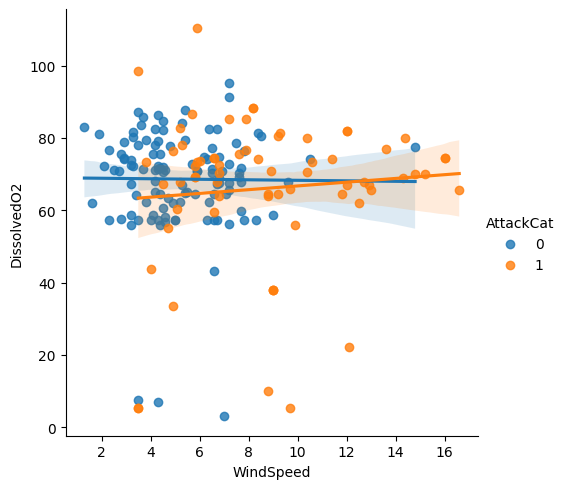

In [15]:
# Code for Visualization 4
# Recommended way
sns.lmplot(x='WindSpeed', y='DissolvedO2', data=df,
           fit_reg=True, # No regression line
           hue='AttackCat')   # Color by evolution stage

### 4.  START OF DELIVERABLE 2 - Data Preprocessing for Modeling
<p>Our first example will explore a combination of categorical and numeric features in the dataset.  The numeric features have not been scaled which will handle the different ranges of values present in the continuous variables.  We will be using a powerful feature of scikit-learn, the standard scaler, to scale the  variables.  The Standard Scaler that we will use is the z-score scaler so 0 means the mean, -1 and +1 is one standard deviation from the mean, etc.  The lower the value the further away from the mean in a negative way, the higher the value the further away from the mean in a positive way.  We will then explore three models:  Knn, Decision Trees and Random Forest and compare the accuracy of the models. We will also use train and test data with a default train test split.</p>

#### 4. A. Setting up the models<br><p>You can simply run this code, we are getting some variables set up so we can run our three machine learning models. </p>

In [16]:
# setting y to the target variable attack yes or 1, no or 0
y = df["AttackCat"]
# dropping the target variable from X
# you can also drop other variables
X = df.drop(["AttackCat"], axis=1)

# setting the parameters for the models
knn = KNeighborsClassifier(n_neighbors=3)
rfc = RandomForestClassifier()
dt = DecisionTreeClassifier(random_state=0)

clNames = ["KNN", "Random Forests", "Decision Trees"]
classifiers = [knn,rfc,dt]
classifierScores = []

#### 4. B. Numeric Feature Scaling with the Standard Scaler (can improve accuracy)<br><p>You can simply run this code - we are scaling the numeric variables around the mean (z scores) so the ranges will all be the same.  We are excluding the Moon Phases and Wind Direction because we want their actual codes, not a z-score representation.</p>

In [17]:
# set scaler to StandardScaler
scaler = StandardScaler()
# save a feature that is not included, add it back at end
name_var = X['MoonPhaseCatExtendCodes']
name_var2 = X['DirectionDiscIntCodes']
X.drop(columns=['MoonPhaseCatExtendCodes','DirectionDiscIntCodes'])
# get numeric data in num_X
num_X = X.select_dtypes(exclude=['category'])

# update the cols with their normalized or scaled values
X[num_X.columns] = scaler.fit_transform(num_X)

In [18]:
#add MoonPhaseCatExtendDisc and then let's take a look at X
X['MoonPhaseCatExtendCodes']=name_var
X['DirectionDiscIntCodes']=name_var2
X.head()

,MoonPhaseCatExtendCodes,StationPressure,WindSpeed,Salinity,Turbidity,DissolvedO2,DirectionDiscIntCodes
0,0,-0.020829,-0.047978,-0.445868,-0.211224,0.888647,5
1,0,0.340207,-0.680726,-0.952723,-0.162624,0.463867,5
2,2,-0.381866,0.300034,-1.291792,-0.256037,0.647053,5
3,2,-0.381866,-0.364352,-0.789931,-0.323888,1.192630,5
4,3,0.159689,0.205122,-0.677074,0.091421,1.407675,0


#### 4.C. For Knn, Changing Categorical Features to Numbers
<p>We have to convert categorical features to a numerical value for Knn.  In order to encode this data, you could map each value to a number. e.g. Overcast:0, Rainy:1, and Sunny:2.</p>
<p>
This process is known as label encoding, and sklearn conveniently will do this for you using Label Encoder.<p>

#### A refresher on moon phases and Wind Direction:  back to domain knowledge! (CRISP-DM is a cyclical process)<br>
<p>At Full and New Moon, the effect on tides is the greatest and causes "high tide".  Neap tides are when the tides are decreasing after full and new moon; Spring tides are when the tides are rising toward full and new moon phases.</p>
<p>A feature that is already encoded is Moon Phase Cat Extend Codes:  0 - quarter moons, 1 - Neap Tides, 2 - Spring Tides, 3 - Full and New Moon</p>
<p>Another features is Wind Direction - 1 - NE, 2 - E, 3 - SE, 4 - S, 5 - W, 6 - SW.  Surf fishers say the fishing is best with south and westerly winds.</p>
<p>From <a href="https://sciencing.com/effects-moon-phases-ocean-tides-8435550.html">Sciencing.Com Moon Phases and Ocean</a></p>
<p>You can just run this code;Sci-kit learn does all the work for you!</p>

In [19]:
# Label Encoding with Sci-kit learn
from sklearn import preprocessing
# creating le LabelEncoder
le = preprocessing.LabelEncoder()
# transforming just the categorical and int or non scaled attributes (do not do this on the numeric attributes)
X['MoonPhaseCatExtendCodes'] = le.fit_transform(X['MoonPhaseCatExtendCodes'])
X['DirectionDiscIntCodes'] = le.fit_transform(X['DirectionDiscIntCodes'])
X.head()

,MoonPhaseCatExtendCodes,StationPressure,WindSpeed,Salinity,Turbidity,DissolvedO2,DirectionDiscIntCodes
0,0,-0.020829,-0.047978,-0.445868,-0.211224,0.888647,5
1,0,0.340207,-0.680726,-0.952723,-0.162624,0.463867,5
2,2,-0.381866,0.300034,-1.291792,-0.256037,0.647053,5
3,2,-0.381866,-0.364352,-0.789931,-0.323888,1.192630,5
4,3,0.159689,0.205122,-0.677074,0.091421,1.407675,0


#### 4. C. Create the Train-Test-Split<br><p>You can run this code - we have learned about train-test-split for building and evaluating models with our previous class work.</p>

In [20]:
# convert string variables to One Hot Encoding if needed for certain models
# such as Association Rules (not in this Deliverable)
# X = pd.get_dummies(X)

# build train test split for modeling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

### 5.  Modeling
<p>We will explore three models:  Knn, Decision Trees and Random Forest and compare the accuracy of the models. We will be using supervised machine learning with the train-test-split data</p>

#### 5.  A. Knn or K Nearest Neighbors
<p>KNN requires scaling of data because KNN uses the Euclidean distance between two data points to find nearest neighbors. Euclidean distance is sensitive to magnitudes. The features with high magnitudes will weight more than features with low magnitudes. KNN also is not suitable for large dimensional data. We need to convert the categorical data to </p>
<p><font color=RED>VIDEO: </font>Watch the video to learn more about Knn for predictive models.</p>
<p><a href="https://youtu.be/4HKqjENq9OU">Understanding Knn</a></p>
<p><a href="https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn#:~:text=KNN%20requires%20scaling%20of%20data%20because%20KNN%20uses,KNN%20also%20not%20suitable%20for%20large%20dimensional%20data">Datacamp:  KNN Tutorial (short)</a></p>

#### 5. B. Knn Modeling<br>
<p>Run the four code blocks below for KNN Modeling - the last shows the accuracy.  Remember our baseline!</p>


In [21]:
# We will start with k nearest neighbors = 3
# build the knn model with the training data
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [22]:
# Prediction, print confusion matrix for the test data
kPred = knn.predict(X_test)
print(confusion_matrix(y_test, kPred))

[[32  4]
 [13 12]]


In [23]:
# print classification report
print(classification_report(y_test,kPred))

              precision    recall  f1-score   support

           0       0.71      0.89      0.79        36
           1       0.75      0.48      0.59        25

    accuracy                           0.72        61
   macro avg       0.73      0.68      0.69        61
weighted avg       0.73      0.72      0.71        61



In [24]:
# print accuracy
knnAcc = accuracy_score(y_test,kPred) * 100
knnAcc = round(knnAcc, 2)
print("Accuracy: {knnAcc}%".format(knnAcc=knnAcc))

Accuracy: 72.13%


#### 5. C. Random Forest<br>
<p>Run the four code blocks below for Random Forest Modeling - the last shows the accuracy. See if we are improving over the Knn model for prediction!</p>


In [25]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [26]:
rfcPred = rfc.predict(X_test)
print(confusion_matrix(y_test, rfcPred))

[[33  3]
 [ 8 17]]


In [27]:
print(classification_report(y_test,rfcPred))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86        36
           1       0.85      0.68      0.76        25

    accuracy                           0.82        61
   macro avg       0.83      0.80      0.81        61
weighted avg       0.82      0.82      0.82        61



In [28]:
rfAcc = accuracy_score(y_test,rfcPred) * 100
rfAcc = round(rfAcc, 2)
print("Accuracy: {rfAcc}%".format(rfAcc=rfAcc))

Accuracy: 81.97%


#### 5. D. Decision Trees<br>
<p>Run the three code blocks below for Decision Tree Modeling - the last shows the accuracy. See if we are improving over the Knn and Random Forest models for prediction! The last code block visualizes the tree.</p>


In [29]:
from sklearn import tree
dt = tree.DecisionTreeClassifier(random_state=0, criterion='entropy')
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [30]:
dtPred = dt.predict(X_test)

dtAcc = accuracy_score(y_test,dtPred) * 100
dtAcc = round(dtAcc, 2)
print("Accuracy: {dtAcc}%".format(dtAcc=dtAcc))

Accuracy: 67.21%


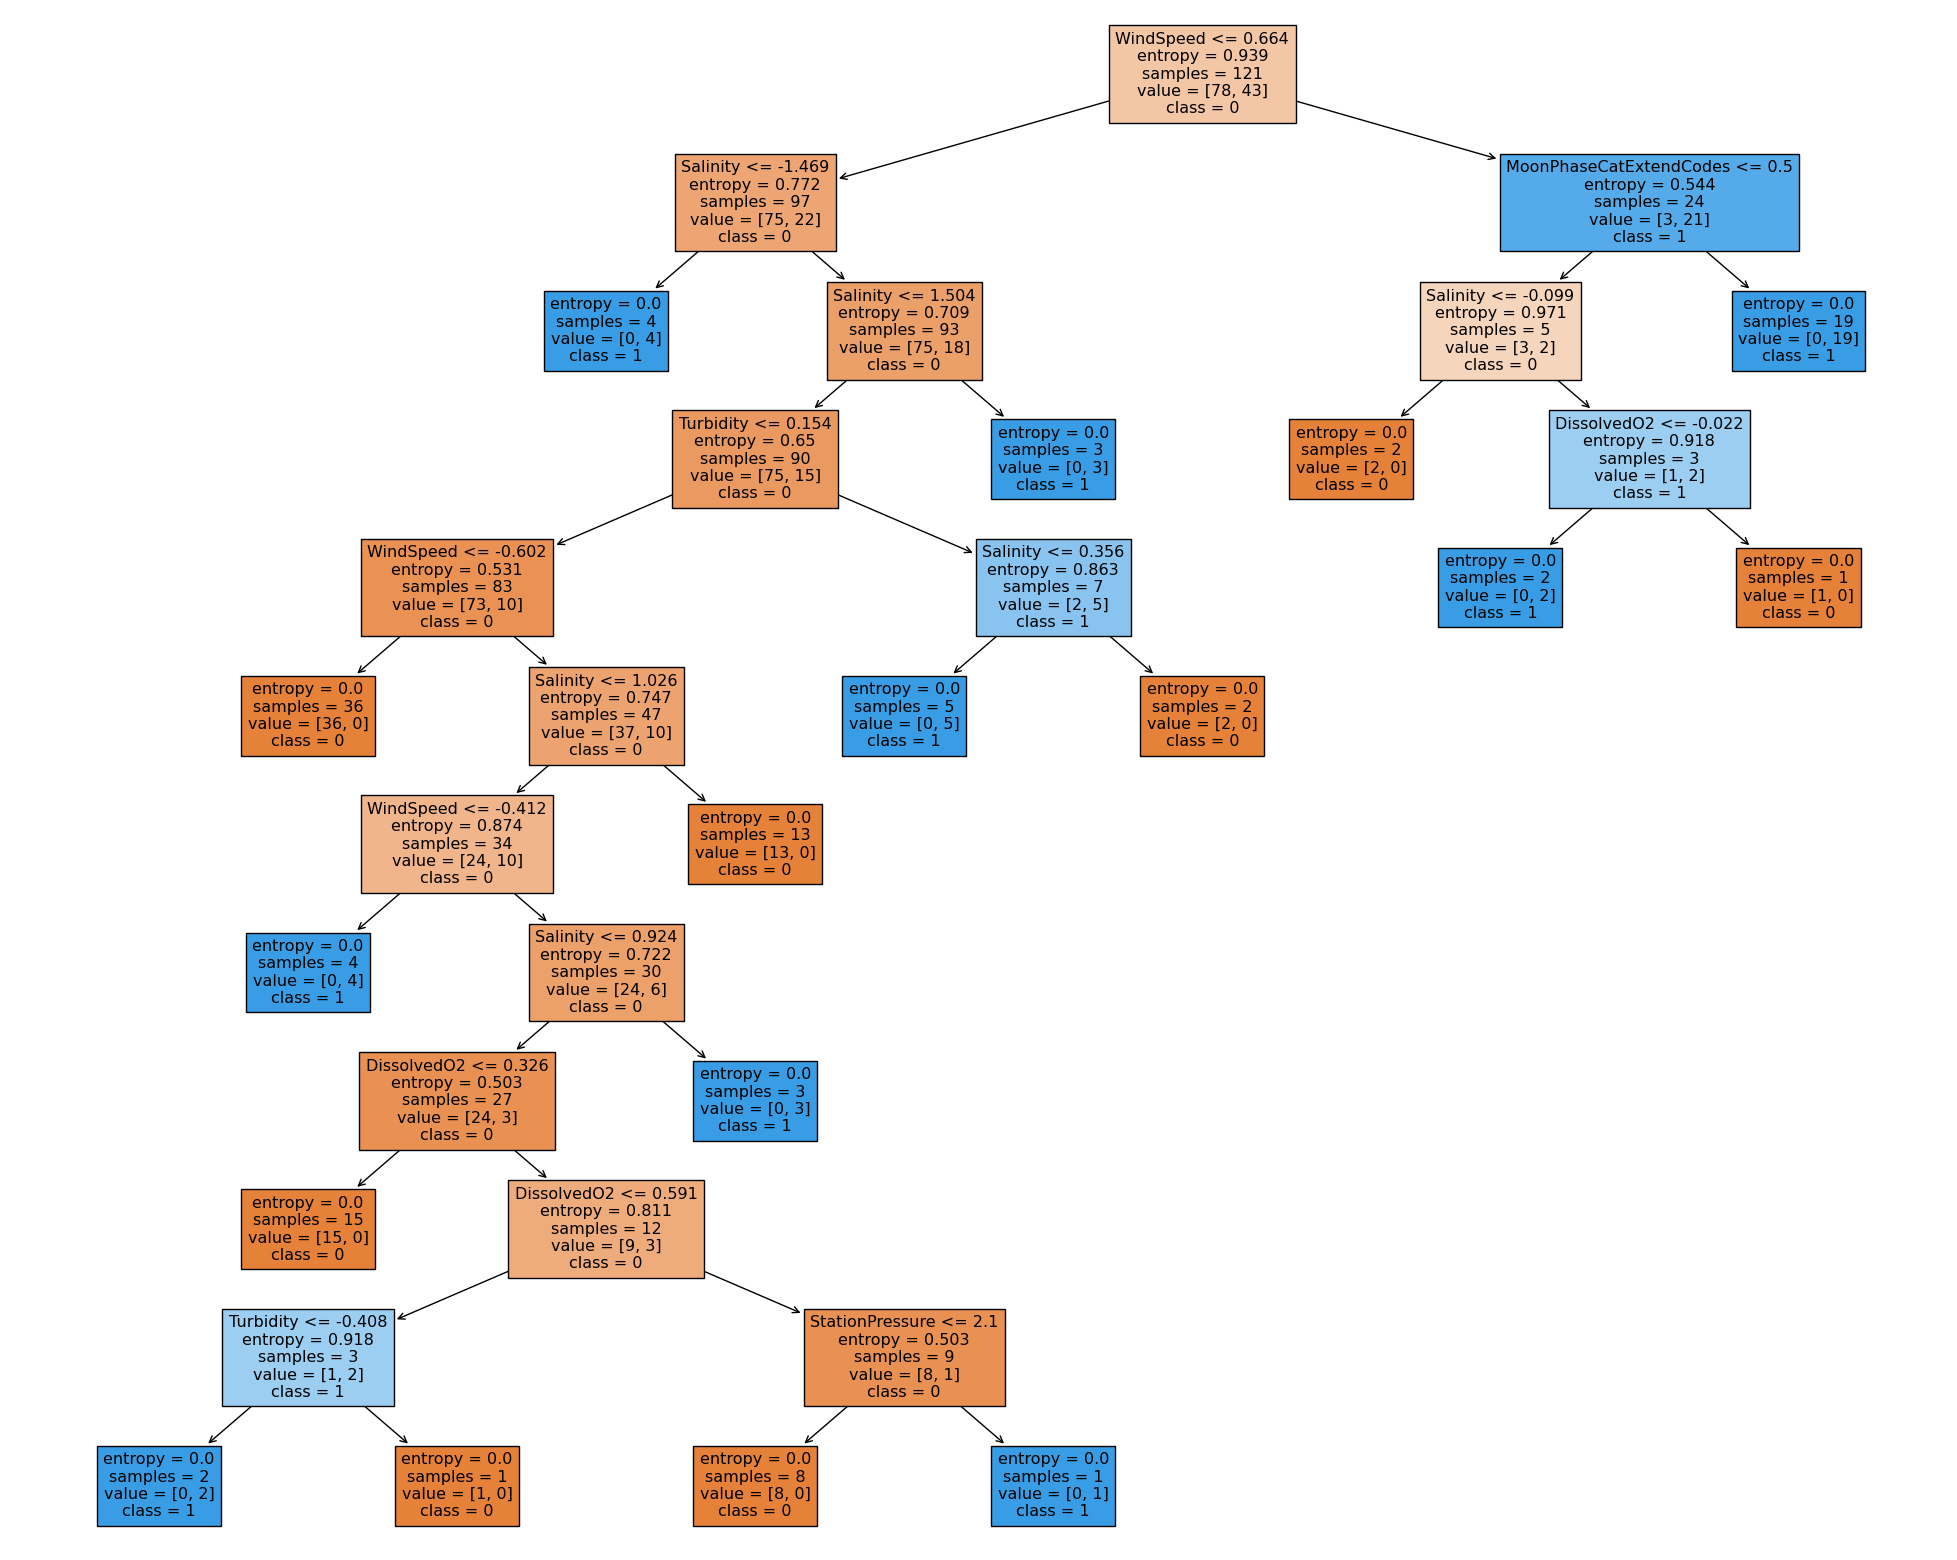

In [31]:
# let's visualize the decision tree
dt_feature_names = list(X.columns)
dt_target_names = [str(s) for s in y.unique()]
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt,
                   feature_names=dt_feature_names,
                   class_names=dt_target_names,
                   filled=True)

<font color=RED>QUESTION:</font><p>Some researchers are studying the effect of wind on shark presence in near shore waters.  This is a relatively new area of research. Take a look at what they are saying: <a href="https://abc7.com/shark-attack-attacks-sharks-tagging/5388879/#:~:text=They%20said%20sea%20breeze%20at%20the%20sites%20of,white%20and%20others%20head%20up%20the%20Eastern%20Seaboard">Does the sea breeze make shark attacks more likely?</a></p>
<p>Another resource:  <a href="https://www.yahoo.com/gma/meet-2-scientists-trying-forecast-104935603.html?guccounter=1&guce_referrer=aHR0cHM6Ly93d3cuYmluZy5jb20vc2VhcmNoP3E9RHIuK0dyZWcrU2tvbWFsK2FuZCtOYXRpb25hbCtXZWF0aGVyK1NlcnZpY2UrbWV0ZW9yb2xvZ2lzdCtKb2UrTWVyY2hhbnQmc3JjPUlFLVNlYXJjaEJveCZGT1JNPUlFU1I0Tg&guce_referrer_sig=AQAAAJjrmPNw7ZiCXSsVFmG7PYyxb3WaHU0MFNzSPhE-60Xgzc6-V-mHo4HRP1yMGkKKvnVHAxhwj7ZL-3hd9JDcKvdlsUf9k0oIEp5xEpKEGxyo8CEOPpF-ADJkan8ajzUIjj8f-lF8srjWtrGA-fP7HeLGZpZ98RabEdokIuerouIJ">Sea Breeze and Shark Attacks</a></p>
<p>Based on our work, what do you think?  Does wind play a role in shark presence, even attacks, in near shore waters off of the coast of North and Scuth Carolina (our data)?</p><br>
<p>Based on our work about the shark attacks, I think that wind does play a factor in the presences of sharks on or near shore waters. In deliverable one I made a histogram to view the trendline of Wind speeds and from that it is shown that majority of the Attacts near shore happened during the lower wind speeds. However, in deliverable one, I also created a scatter plot comparing Dissolved O2 and Wind Speed. When observing that scatter plot, it made it very apparent that as wind speed increased, the likelihood of their being a shark attack was almost guaranteed.  <p/>

<font color=RED>QUESTION: </font> <p>What other variables seem to play a role?  Going by the decision tree or your earlier visualizations, research features or variables of interest and document your findings.</p><br>
<p>While I think that every variable somehow plays a part in whether a shark will appear at shore or attack, aside from windspeed there aren't very many variables that have clear data displaying that they are an extreme decider. When looking at scatter plots comparing all of the different variables in deliverable one, there were not many scatter plots that showed extreme evidecne that any of the factors were extremely important. </p>

#### 6. Evaluation<br>
<p>Let's compare the models.</p>
<p>Then try a prediction to see if the decision tree model predicts 1 for shark presence, or 0 for no shark presence!</p><p>Run the first code block and second code block.  You can change the variables for the second code block - remember numeric variables are scaled so 0 is close to the mean, negative numbers are lower than the mean, positive numbers are above the mean - standard deviaion units so -3 and +3 are extremely low and high.</p>

In [ ]:
classifiers = ["KNN", "Random Forests", "Decision Trees"]
accuracies = [knnAcc, rfAcc, dtAcc]
x = np.arange(len(classifiers))
ytickLabels = ["0%","10%","20%","30%","40%","50%","60%","70%","80%","90%","100%"]
yticks = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
plt.figure(figsize=(10, 15))
plt.bar(x, accuracies, align='center', alpha=0.5)
plt.xticks(x, classifiers)
plt.yticks(yticks, ytickLabels)
plt.ylabel('Accuracy')
plt.title('Classifier Accuracy')
plt.show()

In [ ]:
#let's try a prediction
#we will input a sample MoonPhaseCatExtendCodes, StationPressure
#WindSpeed, Salinity, Turbidity, DissolvedO2, DirectionDiscIntCodes
# you can change the values of the variables
moon = 3
stationpressure = 1.0
windspeed = 2
salinity = 1
turbidity = 0
dissolved02 = 0
winddirection = 8
# dt.predict uses the decision tree model that has been built previously
prediction = dt.predict([[moon,stationpressure,windspeed,salinity,turbidity,dissolved02,winddirection]])
# let's see what the prediction is - 1 is yes to shark presence, 0 is mo
print("The prediction is ", prediction)